Setup for installing pytorch Geometry as it must match with version for pytorch

In [1]:
!pip install pennylane -q
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    if version is None:
        # CUDA not found, use 'cpu' to try and get CPU-compatible wheels
        return 'cpu'
    return 'cu' + version.replace('.', '')

TORCH_version_detected = torch.__version__ # Keep original detection
TORCH_detected = format_pytorch_version(TORCH_version_detected)
CUDA_version_detected = torch.version.cuda
CUDA_detected = format_cuda_version(CUDA_version_detected)

print(f"Detected PyTorch: {TORCH_detected}, CUDA: {CUDA_detected}")
print("Installing PyTorch Geometric Dependencies...")

# --- Proposed Fix: Use a stable PyTorch version for PyG dependencies ---
# Uninstall existing torch and torchvision to prepare for a specific version.
# Note: This will require restarting the Colab runtime after execution.
!pip uninstall -y torch torchvision torchaudio pytorch-cuda || true

# Install a specific stable PyTorch version (e.g., 2.3.0) and its compatible CUDA toolkit.
# Since CUDA was detected as 'cpu', we'll stick to CPU for the installation.
# For CPU, typically PyTorch versions like 2.3.0 are well-supported by PyG extensions.
TARGET_TORCH_VERSION = "2.3.0"
TARGET_CUDA_VERSION_STRING = "cpu" # Sticking to CPU as detected

# Install PyTorch
!pip install torch=={TARGET_TORCH_VERSION} torchvision torchaudio --index-url https://download.pytorch.org/whl/{TARGET_CUDA_VERSION_STRING}

# Now install PyTorch Geometric dependencies using the TARGET_TORCH_VERSION and TARGET_CUDA_VERSION_STRING
# We need to make sure the format matches what PyG expects for its wheels.
# For CPU, it's 'torch-X.Y.Z+cpu.html'
PYG_WHL_URL = f"https://data.pyg.org/whl/torch-{TARGET_TORCH_VERSION}+{TARGET_CUDA_VERSION_STRING}.html"

!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f {PYG_WHL_URL}
!pip install torch_geometric

print("Installation Complete! ✅")
print(f"Note: PyTorch was reinstalled to version {TARGET_TORCH_VERSION} for PyTorch Geometric compatibility.")
print("Please restart your Colab runtime (Runtime -> Restart runtime) for the changes to take effect.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.6/935.6 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 138.2 MB/s eta 0:00:00
Detected PyTorch: 2.9.0, CUDA: cpu
Installing PyTorch Geometric Dependencies...
Found existing installation: torch 2.9.0+cpu
Uninstalling torch-2.9.0+cpu:
  Successfully uninstalled torch-2.9.0+cpu
Found existing installation: torchvision 0.24.0+cpu
Uninstalling torchvision-0.24.0+cpu:
  Successfully uninstalled torchvision-0.24.0+cpu
Found existing installation: torchaudio 2.9.0+cpu
Uninstalling torchaudio-2.9.0+cpu:
  Successfully uninstalled

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.1 MB/s eta 0:00:00
Installation Complete! ✅
Note: PyTorch was reinstalled to version 2.3.0 for PyTorch Geometric compatibility.
Please restart your Colab runtime (Runtime -> Restart runtime) for the changes to take effect.


Downloading data from zenodo of particle jet for Task 2:

In [ ]:
# Download 1 file of the Quark/Gluon Dataset from Zenodo
!wget -O QG_jets.npz https://zenodo.org/record/3164691/files/QG_jets.npz?download=1

print("Data Downloaded! File name: QG_jets.npz")

--2026-02-01 04:55:40--  https://zenodo.org/record/3164691/files/QG_jets.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.153, 137.138.52.235, 188.185.48.75, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.153|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3164691/files/QG_jets.npz [following]
--2026-02-01 04:55:41--  https://zenodo.org/records/3164691/files/QG_jets.npz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 106689379 (102M) [application/octet-stream]
Saving to: ‘QG_jets.npz’

QG_jets.npz         100%[===================>] 101.75M  2.10MB/s    in 3m 33s  

2026-02-01 04:59:14 (489 KB/s) - ‘QG_jets.npz’ saved [106689379/106689379]

Data Downloaded! File name: QG_jets.npz


Checking shapes and structure:

In [ ]:
import numpy as np

# Load the file
data = np.load('QG_jets.npz')

# Extract arrays
# X: (Number of Jets, Number of Particles, Features)
X = data['X']
# y: Labels (1 = Quark, 0 = Gluon)
y = data['y']

print("--- Data Shapes ---")
print(f"Total Jets: {X.shape[0]}")
print(f"Particles per Jet: {X.shape[1]}")
print(f"Features per Particle: {X.shape[2]}")
print("\n--- Example Jet (First 5 particles) ---")
# Features are usually: [pt, eta, phi, mass]
print(X[0, :5, :])

--- Data Shapes ---
Total Jets: 100000
Particles per Jet: 139
Features per Particle: 4

--- Example Jet (First 5 particles) ---
[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
 [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
 [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]
 [ 4.13159146e+00  1.73686350e-01  4.76622410e+00 -3.21000000e+02]
 [ 1.69599701e+00 -2.12177764e-01  4.79687162e+00 -2.11000000e+02]]


Converting numpy array data into Graphs for GNN:

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import knn_graph

# Hum sirf pehle 2000 jets utha rahe hain speed ke liye
X_subset = X[:2000]
y_subset = y[:2000]

data_list = []

print("Converting Jets to Graphs... (Please wait)")

for i in range(len(X_subset)):
    # 1. Get features for current jet (139, 4)
    jet_data = X_subset[i]
    label = y_subset[i]

    # 2. Convert to Tensor
    x_tensor = torch.tensor(jet_data, dtype=torch.float)

    # 3. Masking: Remove Zero-Padding
    # Asli particles wo hain jinka Energy (col 0) > 0 hai
    mask = x_tensor[:, 0] > 0
    x_real = x_tensor[mask]  # Sirf asli particles bachenge

    # Agar jet khali hai (error case), skip karo
    if x_real.shape[0] < 5:
        continue

    # 4. Create Edges (Connect neighbors)
    # k=10 matlab har particle apne 10 qareebi doston se judega
    # Loop=False matlab khud se nahi judega
    edge_index = knn_graph(x_real, k=10, loop=False)

    # 5. Create Graph Object
    # y (Label) ko LongTensor banana zaroori hai classification ke liye
    graph = Data(x=x_real, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

    data_list.append(graph)

print(f"Success! Converted {len(data_list)} graphs.")
print("\n--- Example Graph 0 ---")
print(data_list[0])

Converting Jets to Graphs... (Please wait)
Success! Converted 2000 graphs.

--- Example Graph 0 ---
Data(x=[18, 4], edge_index=[2, 180], y=[1])


Making class for GNN (Graph Neural Network):

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader

# 1. Prepare Data Loader (Batching)
# Hum 64 graphs ek saath bhejenge training ke liye
train_loader = DataLoader(data_list, batch_size=64, shuffle=True)

# 2. Define the GNN Architecture
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)

        # Layer 1: Input (4 features) -> Hidden (64)
        self.conv1 = GCNConv(4, hidden_channels)

        # Layer 2: Hidden (64) -> Hidden (64)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # Layer 3: Classifier (64 -> 2 Classes)
        self.lin = torch.nn.Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Message Passing (Convolution)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()

        # 2. Readout Layer (Pooling)
        # 18 particles -> 1 Graph Vector
        x = global_mean_pool(x, batch)

        # 3. Classification
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

# Model ko initialize karo
model = GNN(hidden_channels=64)
print(model)

GNN(
  (conv1): GCNConv(4, 64)
  (conv2): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Applying GNN (Graph Neural Network):

In [ ]:
import torch
from torch_geometric.loader import DataLoader

# 1. Split Data (80% Train, 20% Test)
# Humne 2000 graphs banaye the
train_size = int(len(data_list) * 0.8)
test_size = len(data_list) - train_size

train_dataset = data_list[:train_size]
test_dataset = data_list[train_size:]

print(f"Training on {len(train_dataset)} graphs, Testing on {len(test_dataset)} graphs.")

# 2. Loaders (Batching)
# 64 graphs ek saath bhejenge
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. Setup Device (GPU use karega agar available hai)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# 4. Training Function
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        # Pass data through model
        out = model(data.x, data.edge_index, data.batch)
        # Calculate error
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# 5. Testing Function
def test(loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)  # Jo probability zyada hai (0 ya 1)
            correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

# --- START TRAINING ---
print("\nStarting Training...")
for epoch in range(1, 16): # 15 Epochs
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Training on 1600 graphs, Testing on 400 graphs.
Using device: cpu

Starting Training...
Epoch: 01, Loss: 1.3600, Train Acc: 0.7369, Test Acc: 0.7325
Epoch: 02, Loss: 0.6214, Train Acc: 0.7406, Test Acc: 0.7200
Epoch: 03, Loss: 0.5706, Train Acc: 0.7438, Test Acc: 0.7425
Epoch: 04, Loss: 0.5839, Train Acc: 0.7419, Test Acc: 0.7375
Epoch: 05, Loss: 0.5835, Train Acc: 0.7400, Test Acc: 0.7350
Epoch: 06, Loss: 0.5819, Train Acc: 0.7431, Test Acc: 0.7325
Epoch: 07, Loss: 0.5664, Train Acc: 0.7444, Test Acc: 0.7325
Epoch: 08, Loss: 0.5638, Train Acc: 0.7294, Test Acc: 0.7550
Epoch: 09, Loss: 0.5722, Train Acc: 0.7419, Test Acc: 0.7225
Epoch: 10, Loss: 0.5642, Train Acc: 0.7444, Test Acc: 0.7400
Epoch: 11, Loss: 0.5694, Train Acc: 0.7469, Test Acc: 0.7250
Epoch: 12, Loss: 0.5776, Train Acc: 0.7312, Test Acc: 0.7450
Epoch: 13, Loss: 0.5793, Train Acc: 0.7475, Test Acc: 0.7200
Epoch: 14, Loss: 0.5752, Train Acc: 0.7356, Test Acc: 0.7400
Epoch: 15, Loss: 0.5871, Train Acc: 0.7362, Test Acc: 0.75

TASK VI: Quantum Representation

Getting data of Mnist for task:

Total Images (0 and 1 only): 12665


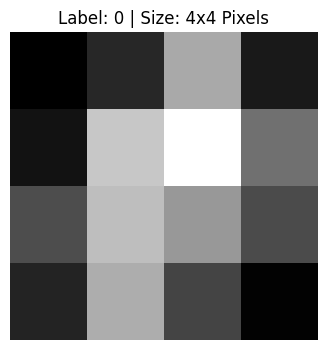

Original Pixel Values (Flattened):
torch.Size([16])


In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Settings ---
# Hum image ko chota karke 4x4 bana rahe hain
# Kyunki humare Quantum Circuit mein sirf 16 Qubits/Inputs ki jagah hogi
transform = transforms.Compose([
    transforms.Resize((4, 4)), # 28x28 -> 4x4
    transforms.ToTensor(),     # Convert to numbers (0 to 1)
])

# --- 2. Download Data ---
print("Downloading MNIST Data...")
# Hum sirf Training data utha rahe hain abhi
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# --- 3. Filter Data (Sirf 0 aur 1 rakhte hain shuru mein) ---
# Poore 10 digits par train karna mushkil hoga.
# Hum sirf '0' aur '1' ko compare karenge (Simple start).
idx = (dataset.targets == 0) | (dataset.targets == 1)
dataset.targets = dataset.targets[idx]
dataset.data = dataset.data[idx]

print(f"Total Images (0 and 1 only): {len(dataset.targets)}")

# --- 4. Visualize (Dekhte hain data kaisa dikh raha hai) ---
# Ek example uthate hain
image, label = dataset[0]

# Plotting
plt.figure(figsize=(4, 4))
plt.imshow(image.squeeze(), cmap='gray') # .squeeze() faltu dimensions hatata hai
plt.title(f"Label: {label} | Size: 4x4 Pixels")
plt.axis('off')
plt.show()

print("Original Pixel Values (Flattened):")
print(image.flatten().shape)

In [ ]:
l,p = dataset[0]
l.shape

torch.Size([1, 4, 4])

In [ ]:
pip install pennylane -q

Now Using SWAP test but first apply simense network:

In [ ]:
import pennylane as qml
from pennylane import numpy as np

# --- 1. Device Setup (9 Qubits) ---
# Wire 0: Referee (Ancilla)
# Wires 1-4: Image 1 ke liye
# Wires 5-8: Image 2 ke liye
dev = qml.device("default.qubit", wires=9)

# --- 2. The Embedding Function (Data Re-uploading) ---
def image_embedding(pixels, weights, wires):
    # 4 Layers (kyunki 16 pixels hain aur 4 qubits hain)
    pixel_batches = pixels.reshape(4, 4)

    for i in range(4): # 4 Rounds
        # Data Loading (RX)
        for j in range(4):
            qml.RX(pixel_batches[i, j], wires=wires[j])

        # Trainable Weights (RY)
        for j in range(4):
            qml.RY(weights[i, j], wires=wires[j])

        # Entanglement (CNOT Ring)
        for j in range(4):
            qml.CNOT(wires=[wires[j], wires[(j+1) % 4]])

# --- 3. The SWAP Test Circuit (Main Code) ---
@qml.qnode(dev)
def swap_test_circuit(params, img1, img2):

    # Step A: Referee ko Superposition mein daalo (Hadamard)
    qml.Hadamard(wires=0)

    # Step B: Dono Images ko Encode karo (Parallel mein)
    # Image 1 -> Wires 1,2,3,4
    image_embedding(img1, params, wires=[1, 2, 3, 4])

    # Image 2 -> Wires 5,6,7,8
    image_embedding(img2, params, wires=[5, 6, 7, 8])

    # Step C: CSWAP (Comparison)
    # Referee (Wire 0) check karega: "Kya Wire 1 aur Wire 5 same hain?"
    qml.CSWAP(wires=[0, 1, 5])
    qml.CSWAP(wires=[0, 2, 6])
    qml.CSWAP(wires=[0, 3, 7])
    qml.CSWAP(wires=[0, 4, 8])

    # Step D: Result close karo
    qml.Hadamard(wires=0)

    # Hum sirf Referee (Wire 0) ki probability check karenge
    return qml.probs(wires=0)

print("Quantum Judge (Swap Test) is Ready! ⚖️")

Quantum Judge (Swap Test) is Ready! ⚖️


Now lets check it:

In [ ]:
# --- Test Data ---
# Koi bhi random 16 pixels ki image bana lete hain
img1 = np.random.rand(16)
img2 = np.random.rand(16) # Dusri random image

# Random Weights (Abhi machine untrained hai)
# Shape: (4 layers, 4 qubits)
weights = np.random.rand(4, 4)

# --- TEST 1: Same vs Same ---
# Image 1 ko Image 1 se hi compare kar rahe hain
result_same = swap_test_circuit(weights, img1, img1)
print(f"Test 1 (Same Image): Similarity = {result_same[0]:.4f}")
# Note: result_same[0] matlab state |0> (Match) ki probability

# --- TEST 2: Same vs Different ---
# Image 1 ko Image 2 se compare kar rahe hain
result_diff = swap_qnode(weights, img1, img2)
print(f"Test 2 (Diff Image): Similarity = {result_diff[0]:.4f}")

Test 1 (Same Image): Similarity = 1.0000
Test 2 (Diff Image): Similarity = 0.8562


In [ ]:
import torch

# --- 1. Setup PyTorch Interface ---
# Hum purane circuit ko PyTorch ke liye ready kar rahe hain
# diff_method="backprop" ka matlab hum gradients calculate kar sakte hain
swap_qnode = qml.QNode(swap_test_circuit, dev, interface="torch", diff_method="backprop")

# --- 2. Data Preparation Function ---
# Hum randomly 'pairs' banayenge training ke liye
def get_batch(batch_size=4):
    img1_batch = []
    img2_batch = []
    labels = []

    for _ in range(batch_size):
        # Do random images uthao
        # Use len(dataset) to ensure we stay within bounds
        idx1 = np.random.randint(0, len(dataset))
        idx2 = np.random.randint(0, len(dataset))

        # Image data extract karo using dataset[idx] to apply the 4x4 transform
        x1_img, y1 = dataset[idx1]
        x2_img, y2 = dataset[idx2]

        x1 = x1_img.flatten().float() * np.pi # Pi se multiply taaki rotation achi ho
        x2 = x2_img.flatten().float() * np.pi

        # Label check karo: Kya dono same number hain? (e.g. 0 aur 0)
        # Agar same hain -> Target = 1.0
        # Agar alag hain -> Target = 0.0
        target = 1.0 if y1 == y2 else 0.0

        img1_batch.append(x1)
        img2_batch.append(x2)
        labels.append(target)

    return torch.stack(img1_batch), torch.stack(img2_batch), torch.tensor(labels)

# --- 3. Initialize Weights (Trainable Parameters) ---
# 4 Layers, 4 Qubits
weights = torch.rand((4, 4), requires_grad=True)

# Optimizer (Adam - Sabse reliable)
opt = torch.optim.Adam([weights], lr=0.1)

# --- 4. Training Loop ---
print("Training Started... (Yeh thoda slow chalega)")

history = []
for epoch in range(5): # 20 Rounds (Demo ke liye)

    # A. Data Lao
    imgs1, imgs2, targets = get_batch(batch_size=4)

    opt.zero_grad()
    loss = 0

    # B. Har pair ke liye Circuit Run karo
    for i in range(len(imgs1)):
        # Prediction: Circuit batayega kitna same hai (Probability of |0>)
        prediction = swap_qnode(weights, imgs1[i], imgs2[i])[0]

        # Loss: (Prediction - Target)^2
        # Agar Target 0 tha aur Prediction 0.8 aayi -> Loss bada hoga
        loss += (prediction - targets[i]) ** 2

    # Average Loss
    loss = loss / len(imgs1)

    # C. Backpropagation (Seekho aur Sudharo)
    loss.backward()
    opt.step()

    history.append(loss.item())
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

print("Training Complete! ✅")

Training Started... (Yeh thoda slow chalega)
Epoch 1: Loss = 0.0045
Epoch 2: Loss = 0.2858
Epoch 3: Loss = 0.3837
Epoch 4: Loss = 0.1792
Epoch 5: Loss = 0.2469
Training Complete! ✅


In [ ]:
x1 = dataset.data[idx1].flatten().float()
x1.shape
dataset.data[90].flatten().shape
y1 = dataset.targets[idx1]


Traing our swap circuit with pytorch

In [ ]:
import torch

# --- 1. Setup PyTorch Interface ---
# Hum purane circuit ko PyTorch ke liye ready kar rahe hain
# diff_method="backprop" ka matlab hum gradients calculate kar sakte hain
swap_qnode = qml.QNode(swap_test_circuit, dev, interface="torch", diff_method="backprop")

# --- 2. Data Preparation Function ---
# Hum randomly 'pairs' banayenge training ke liye
def get_batch(batch_size=4):
    img1_batch = []
    img2_batch = []
    labels = []

    for _ in range(batch_size):
        # Do random images uthao
        # Use len(dataset) to ensure we stay within bounds
        idx1 = np.random.randint(0, len(dataset))
        idx2 = np.random.randint(0, len(dataset))

        # Image data extract karo using dataset[idx] to apply the 4x4 transform
        x1_img, y1 = dataset[idx1]
        x2_img, y2 = dataset[idx2]

        x1 = x1_img.flatten().float() * np.pi # Pi se multiply taaki rotation achi ho
        x2 = x2_img.flatten().float() * np.pi

        # Label check karo: Kya dono same number hain? (e.g. 0 aur 0)
        # Agar same hain -> Target = 1.0
        # Agar alag hain -> Target = 0.0
        target = 1.0 if y1 == y2 else 0.0

        img1_batch.append(x1)
        img2_batch.append(x2)
        labels.append(target)

    return torch.stack(img1_batch), torch.stack(img2_batch), torch.tensor(labels)

# --- 3. Initialize Weights (Trainable Parameters) ---
# 4 Layers, 4 Qubits
weights = torch.rand((4, 4), requires_grad=True)

# Optimizer (Adam - Sabse reliable)
opt = torch.optim.Adam([weights], lr=0.1)

# --- 4. Training Loop ---
print("Training Started... (Yeh thoda slow chalega)")

history = []
for epoch in range(20): # 20 Rounds (Demo ke liye)

    # A. Data Lao
    imgs1, imgs2, targets = get_batch(batch_size=4)

    opt.zero_grad()
    loss = 0

    # B. Har pair ke liye Circuit Run karo
    for i in range(len(imgs1)):
        # Prediction: Circuit batayega kitna same hai (Probability of |0>)
        prediction = swap_qnode(weights, imgs1[i], imgs2[i])[0]

        # Loss: (Prediction - Target)^2
        # Agar Target 0 tha aur Prediction 0.8 aayi -> Loss bada hoga
        loss += (prediction - targets[i]) ** 2

    # Average Loss
    loss = loss / len(imgs1)

    # C. Backpropagation (Seekho aur Sudharo)
    loss.backward()
    opt.step()

    history.append(loss.item())
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

print("Training Complete! ✅")

Training Started... (Yeh thoda slow chalega)
Epoch 1: Loss = 0.0880
Epoch 2: Loss = 0.0275
Epoch 3: Loss = 0.1705
Epoch 4: Loss = 0.1439
Epoch 5: Loss = 0.1689
Epoch 6: Loss = 0.1205
Epoch 7: Loss = 0.1729
Epoch 8: Loss = 0.2106
Epoch 9: Loss = 0.1206
Epoch 10: Loss = 0.2344
Epoch 11: Loss = 0.3477
Epoch 12: Loss = 0.2473
Epoch 13: Loss = 0.1507
Epoch 14: Loss = 0.1703
Epoch 15: Loss = 0.0447
Epoch 16: Loss = 0.1244
Epoch 17: Loss = 0.4150
Epoch 18: Loss = 0.2854
Epoch 19: Loss = 0.0957
Epoch 20: Loss = 0.3535
Training Complete! ✅


**TASK V Quantum GNN:**

 Data is same as it was  for Task II(Run that task data first tu run this Task):*italicized text*

In [ ]:
import numpy as np

# Load the file
data = np.load('QG_jets.npz')

# Extract arrays
# X: (Number of Jets, Number of Particles, Features)
X = data['X']
# y: Labels (1 = Quark, 0 = Gluon)
y = data['y']

print("--- Data Shapes ---")
print(f"Total Jets: {X.shape[0]}")
print(f"Particles per Jet: {X.shape[1]}")
print(f"Features per Particle: {X.shape[2]}")
print("\n--- Example Jet (First 5 particles) ---")
# Features are usually: [pt, eta, phi, mass]
print(X[0, :5, :])

--- Data Shapes ---
Total Jets: 100000
Particles per Jet: 139
Features per Particle: 4

--- Example Jet (First 5 particles) ---
[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
 [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
 [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]
 [ 4.13159146e+00  1.73686350e-01  4.76622410e+00 -3.21000000e+02]
 [ 1.69599701e+00 -2.12177764e-01  4.79687162e+00 -2.11000000e+02]]


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import knn_graph

# Hum sirf pehle 2000 jets utha rahe hain speed ke liye
X_subset = X[:2000]
y_subset = y[:2000]

data_list = []

print("Converting Jets to Graphs... (Please wait)")

for i in range(len(X_subset)):
    # 1. Get features for current jet (139, 4)
    jet_data = X_subset[i]
    label = y_subset[i]

    # 2. Convert to Tensor
    x_tensor = torch.tensor(jet_data, dtype=torch.float)

    # 3. Masking: Remove Zero-Padding
    # Asli particles wo hain jinka Energy (col 0) > 0 hai
    mask = x_tensor[:, 0] > 0
    x_real = x_tensor[mask]  # Sirf asli particles bachenge

    # Agar jet khali hai (error case), skip karo
    if x_real.shape[0] < 5:
        continue

    # 4. Create Edges (Connect neighbors)
    # k=10 matlab har particle apne 10 qareebi doston se judega
    # Loop=False matlab khud se nahi judega
    edge_index = knn_graph(x_real, k=10, loop=False)

    # 5. Create Graph Object
    # y (Label) ko LongTensor banana zaroori hai classification ke liye
    graph = Data(x=x_real, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

    data_list.append(graph)

print(f"Success! Converted {len(data_list)} graphs.")
print("\n--- Example Graph 0 ---")
print(data_list[0])

Converting Jets to Graphs... (Please wait)
Success! Converted 2000 graphs.

--- Example Graph 0 ---
Data(x=[18, 4], edge_index=[2, 180], y=[1])


In [ ]:
import pennylane as qml
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def qgnn_circuit(inputs, weights):
    # Re-uploading data into 4 qubits
    qml.AngleEmbedding(inputs, wires=range(4))
    # Trainable quantum layers
    qml.BasicEntanglerLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

# 1. Prepare Data Loader (Batching)
train_loader = DataLoader(data_list, batch_size=64, shuffle=True)

# 2. Define the GNN Architecture
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)

        # Layer 1: Input (4 features) -> Hidden (64)
        self.conv1 = GCNConv(4, hidden_channels)

        # Layer 2: Hidden (64) -> Hidden (64)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # Layer 3: Projection to 4 features for the 4-qubit Quantum Layer
        self.lin = torch.nn.Linear(hidden_channels, 4)

        # weight_shapes: (Layers, Wires). Using 2 layers on 4 wires.
        weight_shapes = {"weights": (2, 4)}
        self.quantum_layer = qml.qnn.TorchLayer(qgnn_circuit, weight_shapes)

        # Final layer to convert 1 quantum output into 2 class probabilities
        self.out = torch.nn.Linear(1, 2)

    def forward(self, x, edge_index, batch):
        # 1. Message Passing (Convolution)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()

        # 2. Readout Layer (Pooling)
        x = global_mean_pool(x, batch)

        # 3. Hybrid Classification
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)            # Shape: [batch, 4]
        x = self.quantum_layer(x)  # Shape: [batch, 1]
        x = self.out(x)            # Shape: [batch, 2]

        return x

# Model ko initialize karo
model = GNN(hidden_channels=64)
print(model)

GNN(
  (conv1): GCNConv(4, 64)
  (conv2): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=4, bias=True)
  (quantum_layer): <Quantum Torch Layer: func=qgnn_circuit>
  (out): Linear(in_features=1, out_features=2, bias=True)
)


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import pennylane as qml

# --- 1. Define Quantum Circuit ---
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev, interface="torch")
def qgnn_circuit(inputs, weights):
    # Re-uploading data into 4 qubits
    qml.AngleEmbedding(inputs, wires=range(4))
    # Trainable quantum layers
    qml.BasicEntanglerLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

# --- 2. Define Hybrid GNN Class ---
class QuantumGNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(QuantumGNN, self).__init__()
        torch.manual_seed(12345)

        # Graph Layers
        self.conv1 = GCNConv(4, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # Projection to 4 qubits
        self.lin_proj = torch.nn.Linear(hidden_channels, 4)

        # Quantum Layer
        weight_shapes = {"weights": (4, 4)} # 2 layers, 4 qubits
        self.quantum_layer = qml.qnn.TorchLayer(qgnn_circuit, weight_shapes)

        # Final Classifier
        self.classifier = torch.nn.Linear(1, 2)

    def forward(self, x, edge_index, batch):
        # A. Graph Processing
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        # B. Global Pooling (Graph -> Single Vector)
        x = global_mean_pool(x, batch) # Result: [batch_size, 64]

        # C. Projection to Quantum Space
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin_proj(x)           # Result: [batch_size, 4]

        # D. Quantum Processing
        # We apply pi scaling to optimize rotation angles

        x = self.quantum_layer(x)      # Result could be [batch_size]

        # Ensure shape is [batch_size, 1] for the linear layer
        if x.dim() == 1:
            x = x.unsqueeze(1)
        elif x.shape[-1] != 1:
            x = x.reshape(-1, 1)

        # E. Final Classification
        x = self.classifier(x)         # Result: [batch_size, 2]
        return x

# --- 3. Setup Training ---
train_size = int(len(data_list) * 0.8)
train_dataset = data_list[:train_size]
test_dataset = data_list[train_size:]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = QuantumGNN(hidden_channels=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

# --- 4. Run Training ---
print(f"Using device: {device}")
print("Starting Quantum Hybrid Training...")
for epoch in range(1, 10):
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Using device: cpu
Starting Quantum Hybrid Training...
Epoch: 01, Loss: 0.8516, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 02, Loss: 0.7142, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 03, Loss: 0.6929, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 04, Loss: 0.6929, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 05, Loss: 0.6930, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 06, Loss: 0.6930, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 07, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 08, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 09, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975


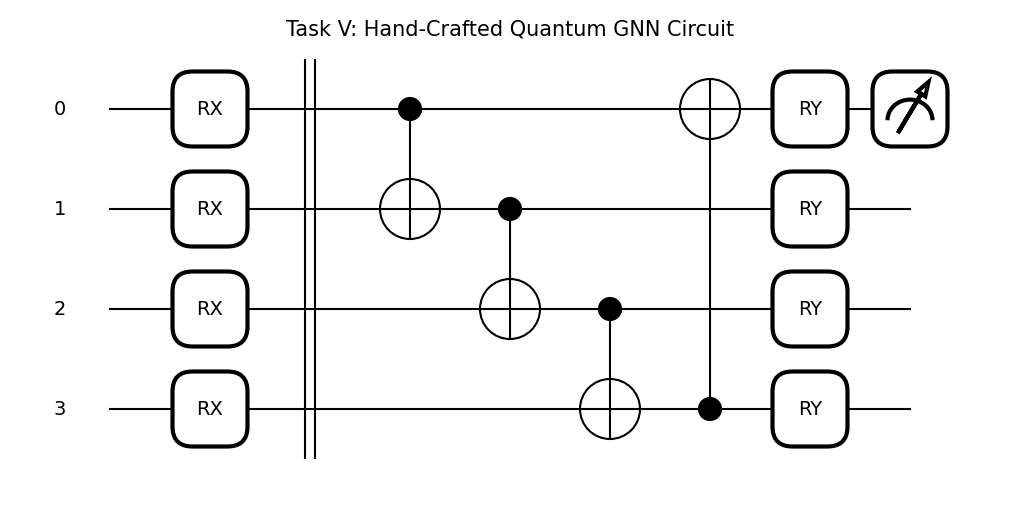

In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
import torch

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def manual_qgnn_circuit(inputs, weights):
    # 1. Manual Data Embedding (RX Gates)
    # AngleEmbedding ki jagah hum khud RX lagayenge
    for i in range(4):
        qml.RX(inputs[i], wires=i)

    qml.Barrier(wires=range(4)) # Diagram mein ek line banayega "Safai" ke liye

    # 2. Manual Trainable Layers (CNOT + RY)
    # weights shape: [layers, qubits]
    for layer_weights in weights:
        # Entanglement (CNOT Ring)
        for i in range(4):
            qml.CNOT(wires=[i, (i + 1) % 4])

        # Rotations (RY Gates)
        for i in range(4):
            qml.RY(layer_weights[i], wires=i)

    return qml.expval(qml.PauliZ(0))

# --- Visualization Code ---
dummy_inputs = torch.tensor([0.1, 0.2, 0.3, 0.4])
dummy_weights = torch.tensor([[0.5, 0.6, 0.7, 0.8]]) # 1 Layer for clean view

fig, ax = qml.draw_mpl(manual_qgnn_circuit)(dummy_inputs, dummy_weights)
fig.suptitle("Task V: Hand-Crafted Quantum GNN Circuit", fontsize=15)
plt.show()

TASK XI " Use a neural network to estimate PQC parameters"

In [28]:
import torch

# 1. Normally distributed data generate karo
num_samples = 500
input_dim = 4  # 4-qubit circuit ke liye 4 features best hain

# X is our input data
X = torch.randn(num_samples, input_dim)

# Target: Training ke liye humein koi ground truth chahiye.
# Task XI mein MSE loss kaha gaya hai, toh hum chahte hain ke model
# specific "Target Angles" seekhe.
target_params = torch.rand(num_samples, input_dim) * 2 * torch.pi

print(f"Input Shape: {X.shape}") # [500, 4]

Input Shape: torch.Size([500, 4])


In [30]:
X.shape

torch.Size([500, 4])

In [9]:
import torch.nn as nn

class ParameterEstimator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ParameterEstimator, self).__init__()
        # Task recommendation: 2-3 Layers
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, output_dim) # Output_dim = Number of Qubits/Parameters
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
mlp = ParameterEstimator(input_dim=4, output_dim=4)


In [26]:
import pennylane as qml

# 4 Qubits ka device define karo
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def pqc_circuit(inputs ):
    # MLP se aye huye parameters ko use karke rotations lagao
    # Har qubit par ek RY gate (State Preparation)
    for i in range(4):
        qml.RY(inputs [i], wires=i)

    # Simple Entanglement taaki circuit 'Parameterized' ban jaye
    for i in range(3):
        qml.CNOT(wires=[i, i+1])

    # Expectation values return karo taaki MSE loss calculate ho sakay
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# MLP ke output ko Quantum Layer mein wrap karo
weight_shapes = {} # Kyunki parameters MLP se aa rahe hain, internal weights nahi chahiye
qlayer = qml.qnn.TorchLayer(pqc_circuit, weight_shapes)

In [27]:
# Model Pipeline
class HybridModel(nn.Module):
    def __init__(self, mlp, qlayer):
        super().__init__()
        self.mlp = mlp
        self.qlayer = qlayer

    def forward(self, x):
        params = self.mlp(x) # Step 2: MLP angles deta hai
        out = self.qlayer(params) # Step 3: PQC state banata hai
        return out

model = HybridModel(mlp, qlayer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss() # Task XI requirement

# Training Loop
for epoch in range(50):
    optimizer.zero_grad()

    # Forward Pass
    predictions = model(X)

    # Loss: Hum chahte hain ke model output 'target_params' ke qareeb ho
    loss = criterion(predictions, X) # Simple case: mapping input to state

    # Backward Pass
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

RuntimeError: shape '[500, -1]' is invalid for input of size 4